# Predicting Players rating

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing',
'finishing' etc. 

The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25000 matches and more than 10000 players for European professional soccer seasons from 2008 to 2016.

Download the data in the same floader and run the following command to get it in the environment.

About the Dataset

The ultimate Soccer database for data analysis and machine learning

The dataset comes in the form of an SQL database and contains statistics of about 25000 football matches, from the top football league of 11 European Countries. It covers seassons from 2008 to 2016 and contains match statistics (i.e., scores, corners, fouls etc ...)as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch. 

* +25000 matches
* +10000 players
* 11 European Countries with their lead championship
* Seasons 2008 to 2016
* Players and Teams 'attributes' sourced from EA sports' FIFA video game series, including the weekly updates.
* Team line up with squad formation (X, Y coordinates)
* Betting odds from up to 10 providers.
* Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10000 matches.

The dataset also has a set of about 35 statistics for each player, derived from EA sports'FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So, for instance if a player has performed poorly over a period of time an his stats get impacted in FIFA, you would normally see the same in the dataset.

#### Python Skills required to complete this project
###### SQL:

The data is in SQL database so students need to retrive using query language. They also need to know how to connect
SQL database worth python. The library we are using for this in 'sqlite3'. 

SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You do not need to install this module 
separately because it is shipped by default along with Python version 2.5.x onwards. 

To use sqlite3 module, you must first create a connection object that represents the database and then optionally
you can create a cursor object, which will help you in executing all the SQL statements. 

##### Pandas:

Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python with Pandas is used in a wide range of fields including academic andcommercial domains including finance, economics, Statistics, analytics etc. In this tutorial we will learn the various features of Python Pandas and how to use them in practice. 

##### Scikit-Learn

Scikit-learn provides a range of supervised and unsupervissed learning algorithm via a consistent interface in Python. 

The library is  built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

* NumPy: Base n-dimensional array package.
* SciPy: Fundamental library for scientific computing. 
* Matplotlib: Comprehensive 2D/3D plotting.
* IPython: Enhanced interactive console.
* Sympy: Symbolic mathematics.
* Pandas: Data structures and analysis.

Extensions or modules for SciPy care conventioally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance.

### Machine Learning skills required to complete the project
##### Supervised learning

Supervised learning deals with learning a function from available training data. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples.

##### Regression

Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. It is prametric in nature because it makes certain assumptions (discussed next) based on the data set. If the data set follows those assumptions, regression gives incredible results. 

##### Model evaluation

Student must know how to judge a model on unseen data. What metric to select to judge the performance. 

#### Let's get started....

###### Import Libraries

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.display import display
%matplotlib inline

### Read Data from the Database into pandas

In [19]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [20]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
pd.options.display.max_columns = None
#pd.set_option('display.max_rows', None)
df.set_index('id', inplace=True)
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
spri

In [23]:
df.describe(include='all')

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142,180748,183142,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,197,NaN,NaN,2,8,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,11794,NaN,NaN,138409,125070,130846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,165671.524291,135900.617324,NaN,68.600015,73.460353,NaN,NaN,NaN,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53851.094769,136927.840510,NaN,7.041139,6.592271,NaN,NaN,NaN,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2.000000,2625.000000,NaN,33.000000,39.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,155798.000000,34763.000000,NaN,64.000000,69.000000,NaN,NaN,NaN,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,183488.000000,77741.000000,NaN,69.000000,74.000000,NaN,NaN,NaN,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,199848.000000,191080.000000,NaN,73.000000,78.000000,NaN,NaN,NaN,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000


In [24]:
df.isnull().sum(axis=0)

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

Drop rows where atleast 836 records for 38 columns out of total 41 columns are NaN because they have overall_rating value as NaN and all other columns except columns named as player_fifa_api_id, player_api_id and date which has no significance in predicting overall rating of a player.

In [26]:
df.dropna(axis=0, how='all', thresh = 38, inplace=True)

In [27]:
df.isnull().sum(axis=0)

player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating           0
potential                0
preferred_foot           0
attacking_work_rate    911
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                  0
reactions                0
balance                  0
shot_power               0
jumping                  0
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                   0
penalties                0
marking                  0
standing_tackle          0
sliding_tackle           0
gk_diving                0
g

In [28]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [29]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [30]:
df.preferred_foot.value_counts()

right    136953
left      44312
Name: preferred_foot, dtype: int64

Text(0.5, 1.0, 'Count Of Preferred Foot')

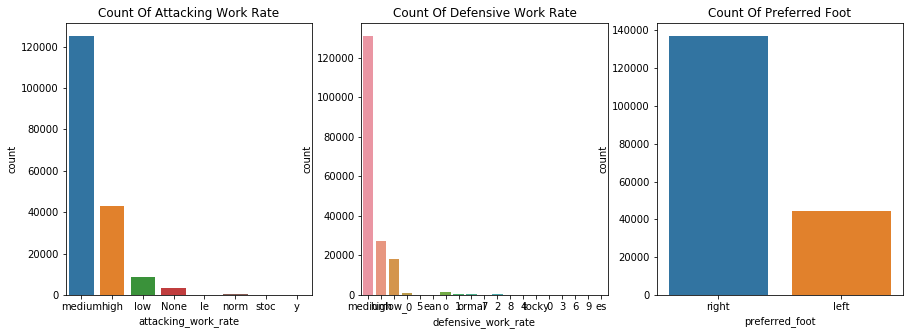

In [31]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.countplot(df.attacking_work_rate)
plt.title('Count Of Attacking Work Rate')
plt.subplot(1,3,2)
sns.countplot(df.defensive_work_rate)
plt.title('Count Of Defensive Work Rate')
plt.subplot(1,3,3)
sns.countplot(df.preferred_foot)
plt.title('Count Of Preferred Foot')

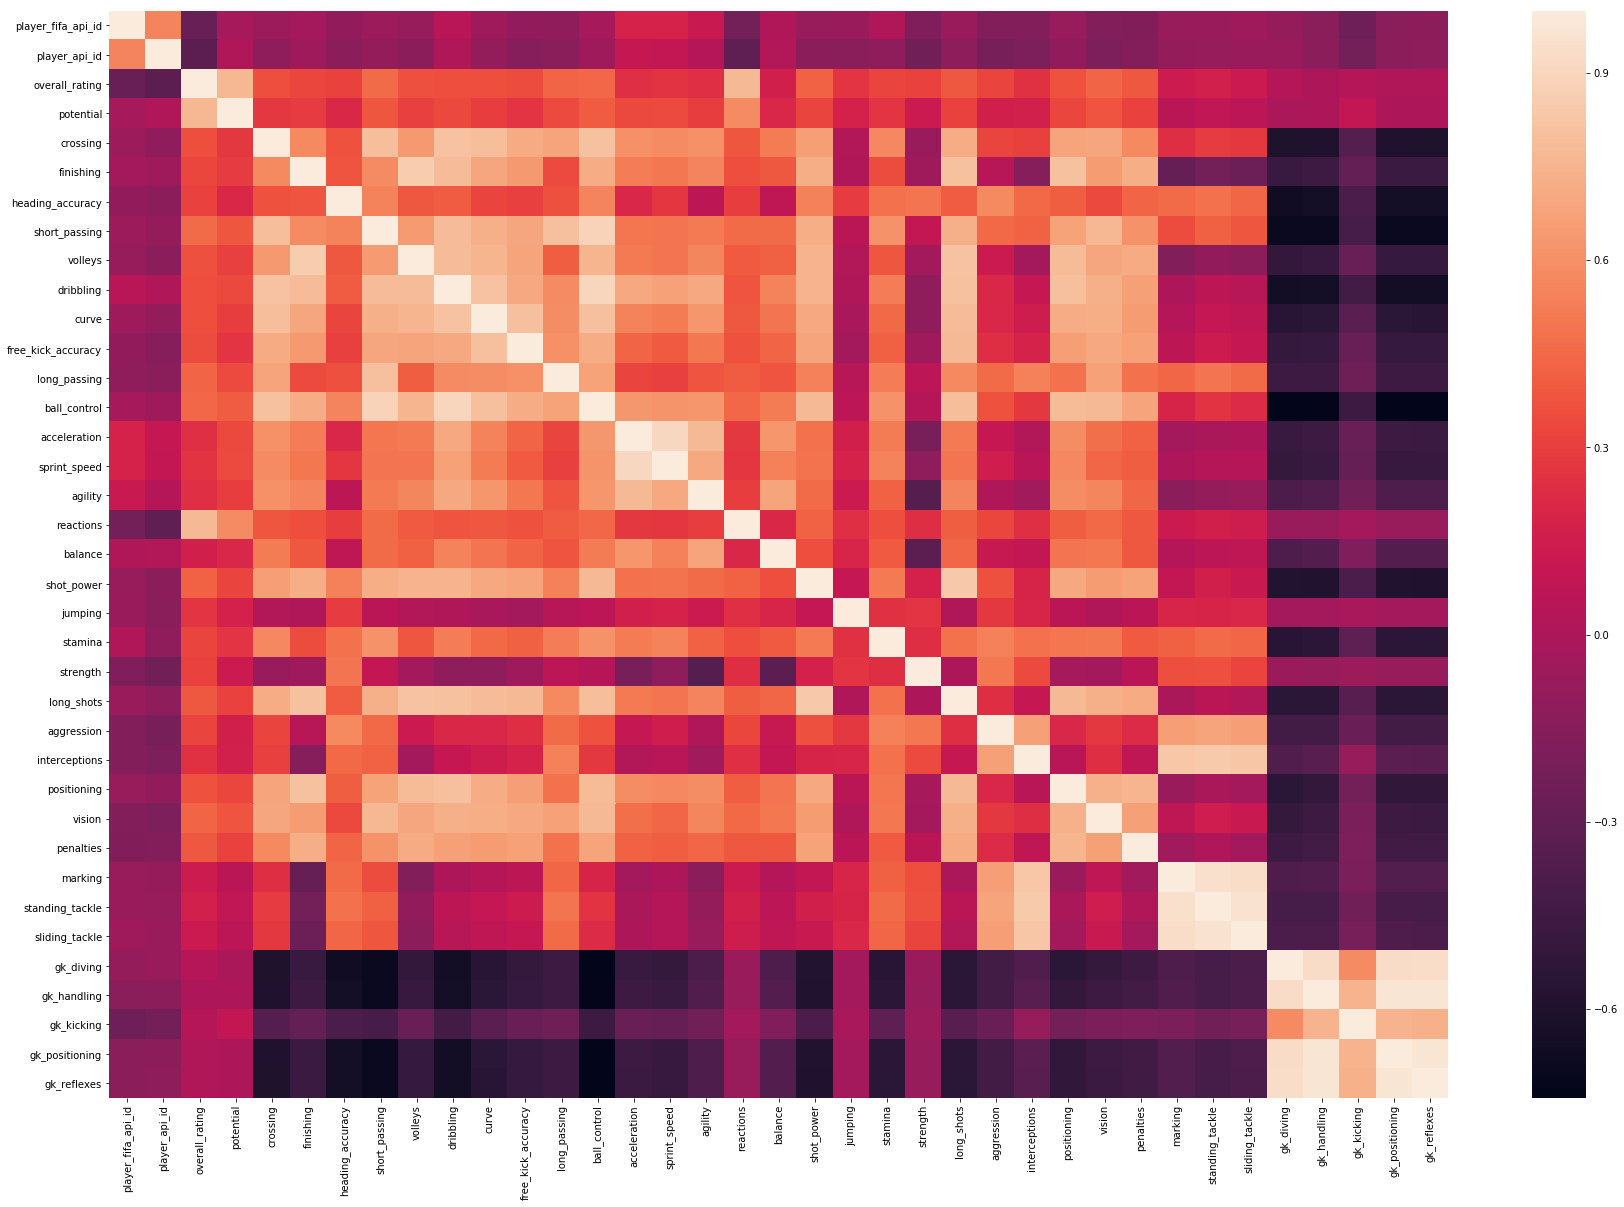

In [32]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr())

## Train and Test Split

### One Hot Encoding

One Hot Encoding is the process of splitting categorical levels to multiple columns. The dataset contains the following three categorical columns which needs hot encoding.

In [33]:
df_dummies_attacking = pd.get_dummies(df.attacking_work_rate, drop_first=True, prefix='attacking')

In [34]:
df_dummies_defensive = pd.get_dummies(df.defensive_work_rate, drop_first=True, prefix='defensive')

In [35]:
df_dummies_preferredfoot = pd.get_dummies(df.preferred_foot, drop_first=True, prefix='preferred')

In [36]:
df = df.join(df_dummies_attacking)

In [37]:
df = df.join(df_dummies_defensive)

In [38]:
df = df.join(df_dummies_preferredfoot)

In [39]:
numerical_df = df.drop(['player_fifa_api_id', 'player_api_id', 'date', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'],axis=1)

#### Fitting Regression Model

In [40]:
numerical_df.columns

Index(['overall_rating', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'attacking_high', 'attacking_le', 'attacking_low',
       'attacking_medium', 'attacking_norm', 'attacking_stoc', 'attacking_y',
       'defensive_1', 'defensive_2', 'defensive_3', 'defensive_4',
       'defensive_5', 'defensive_6', 'defensive_7', 'defensive_8',
       'defensive_9', 'defensive__0', 'defensive_ean', 'defensive_es',
       'defensive_high', 'defensive_low', 'defensive_medium', 'defensive_o',
       'defensive_ormal', 'defensive_tocky', 

After performing backward elimitation using P-values, I identified the below columns as the best possible combination to predict players rating considering the two vital thumbrules. 
1. P values for the selected columns are less than 0.05.
2. R-squared value 0.786 and Adj. R-squared value 0.786 indicates the model is a sweet fit between overfitting and underfitting.

In [41]:
# Building Linear model using statsmodel
lm = smf.ols(formula='overall_rating ~ crossing + finishing + heading_accuracy + short_passing + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + attacking_high + attacking_low + attacking_norm + attacking_y + defensive_1 + defensive_2 + defensive_3 + defensive_6 + defensive_7 + defensive_8 + defensive_9 + defensive__0 + defensive_es + defensive_high + defensive_low + defensive_medium + defensive_o + defensive_ormal + preferred_right', data=numerical_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Sat, 23 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:07:37   Log-Likelihood:            -4.7076e+05
No. Observations:              181265   AIC:                         9.416e+05
Df Residuals:                  181216   BIC:                         9.421e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8482      0.157     30.805      0.000       4.540       5.157
crossing              -0.0099      0.001    -10.231      0.000      -0.012      -0.008
finishing              0.0128      0.001     12.393      0.000       0.011       0.015
heading_accuracy       0.0990      0.001    106.306      0.000       0.097       0.101
short_passing          0.0760      0.002     47.465      0.000       0.073       0.079
dribbling             -0.0100      0.001     -7.373      0.000      -0.013      -0.007
curve                  0.0115      0.001     12.502      0.000       0.010       0.013
free_kick_accuracy     0.0102      0.001     12.285      0.000       0.009       0.012
long_passing           0.0168      0.001     15.372      0.000       0.015       0.019
ball_control           0.2300      0.002    128.150      0.000       0.227       0.234
acceleration           0.0408      0.002     25.759      0.000       0.038       0.044
sprint_speed           0.0490      0.002     32.351      0.000       0.046       0.052
agility               -0.0133      0.001    -11.651      0.000      -0.016      -0.011
reactions              0.2762      0.001    226.250      0.000       0.274       0.279
shot_power             0.0231      0.001     22.689      0.000       0.021       0.025
jumping                0.0130      0.001     15.789      0.000       0.011       0.015
stamina               -0.0157      0.001    -16.454      0.000      -0.018      -0.014
strength               0.0592      0.001     62.059      0.000       0.057       0.061
long_shots            -0.0208      0.001    -19.667      0.000      -0.023      -0.019
aggression             0.0104      0.001     13.011      0.000       0.009       0.012
interceptions          0.0178      0.001     20.795      0.000       0.016       0.019
positioning           -0.0183      0.001    -19.950      0.000      -0.020      -0.017
vision                 0.0085      0.001      8.447      0.000       0.007       0.010
penalties              0.0155      0.001     17.813      0.000       0.014       0.017
marking                0.0328      0.001     25.188      0.000       0.030       0.035
standing_tackle        0.0132      0.002      8.761      0.000       0.010       0.016
sliding_tackle        -0.0269      0.001    -20.990      0.000      -0.029      -0.024
gk_diving              0.2072      0.002    122.382      0.000       0.204       0.210
gk_handling            0.0571      0.002     25.589      0.000       0.053       0.062
gk_kicking            -0.0288      0.001    -39.687      0.000      -0.030      -0.027
gk_positioning         0.0776      0.002     34.944      0.000       0.073       0.082
gk_reflexes            0.0466      0.002     21.387      0.000       0.042       0.051
attacking_high         0.1342      0.0

In [42]:
# Splitting the dataset into the Training set and Test set
X = numerical_df.loc[:,['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'shot_power', 'jumping', 'stamina',  'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',  'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',  'gk_reflexes', 'attacking_high', 'attacking_low', 'attacking_norm', 'attacking_y',  'defensive_1', 'defensive_2', 'defensive_3', 'defensive_6', 'defensive_7', 'defensive_8',  'defensive_9', 'defensive__0', 'defensive_es',  'defensive_high', 'defensive_low', 'defensive_medium', 'defensive_o',  'defensive_ormal', 'preferred_right']].values
y = numerical_df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
train = pd.DataFrame(data=X_train, columns=['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'shot_power', 'jumping', 'stamina',  'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',  'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',  'gk_reflexes', 'attacking_high', 'attacking_low', 'attacking_norm', 'attacking_y',  'defensive_1', 'defensive_2', 'defensive_3', 'defensive_6', 'defensive_7', 'defensive_8',  'defensive_9', 'defensive__0', 'defensive_es',  'defensive_high', 'defensive_low', 'defensive_medium', 'defensive_o',  'defensive_ormal', 'preferred_right'])
train['overall_rating'] = y_train
test = pd.DataFrame(data=X_test, columns=['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'shot_power', 'jumping', 'stamina',  'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',  'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',  'gk_reflexes', 'attacking_high', 'attacking_low', 'attacking_norm', 'attacking_y',  'defensive_1', 'defensive_2', 'defensive_3', 'defensive_6', 'defensive_7', 'defensive_8',  'defensive_9', 'defensive__0', 'defensive_es',  'defensive_high', 'defensive_low', 'defensive_medium', 'defensive_o',  'defensive_ormal', 'preferred_right'])
test['overall_rating'] = y_test

In [44]:
# Fitting Multiple Linear Regression to the Training set using scikit learn
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

In [45]:
model.coef_

array([-0.01091063,  0.01285373,  0.09856289,  0.07623318, -0.01172542,
        0.01218465,  0.01004797,  0.01680315,  0.23190573,  0.03933977,
        0.05029279, -0.01257994,  0.27576198,  0.02269149,  0.01335635,
       -0.01591626,  0.05923225, -0.02052026,  0.01089458,  0.01813407,
       -0.01812792,  0.00820181,  0.015285  ,  0.03176077,  0.01305704,
       -0.02608262,  0.20815556,  0.05604794, -0.0282725 ,  0.07719866,
        0.04677543,  0.13247778,  1.59387185,  0.60659307,  1.73982033,
        2.01553358,  0.98122296,  1.45268028,  1.70314205,  1.91987449,
        1.93350601,  1.10397726,  0.68591287,  1.73982033,  1.58753801,
        1.91554861,  1.27151752,  0.98076852,  0.60659307, -0.05861808])

In [46]:
model.intercept_

4.818588800496002

In [47]:
model.score(X_train, y_train)

0.7871841777907738

In [48]:
model.score(X_test, y_test)

0.7835682543556625

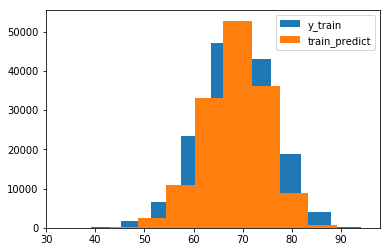

In [49]:
plt.hist(y_train, label='y_train')
plt.hist(model.predict(X_train), label='train_predict')
plt.legend()

### Evaluate Multiple Linear Model Performance

In [50]:
y_train_pred = model.predict(X_train)

In [51]:
y_test_pred = model.predict(X_test)

The below calculation shows that RMSE value for both training and test data is similar and less too. It reveals that model is a good fit.

In [52]:
print('RMSE Train', sqrt(mean_squared_error(y_train_pred, y_train)))
print('RMSE Test' , sqrt(mean_squared_error(y_test_pred, y_test)))

RMSE Train 3.2431204635774393
RMSE Test 3.2699317474260177


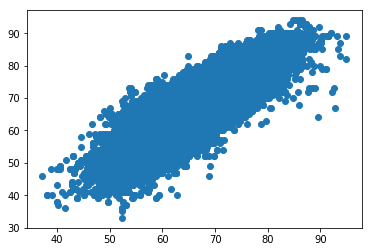

In [53]:
plt.scatter(y_train_pred, y_train)

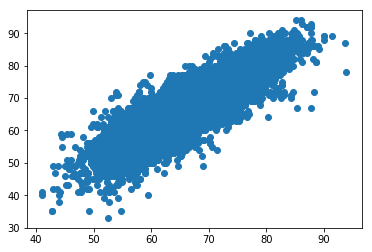

In [54]:
plt.scatter(y_test_pred, y_test)

The below two histograms reveal that error has normal distribution for both training target variable Vs training predicted target variable and test target variable Vs test predicted target variable.

(array([2.0000e+00, 3.0000e+00, 1.5000e+01, 7.0000e+00, 1.2000e+01,
        2.5000e+01, 5.4000e+01, 6.7000e+01, 8.0000e+01, 1.5200e+02,
        2.8800e+02, 4.2600e+02, 8.5900e+02, 1.4770e+03, 2.3990e+03,
        3.6520e+03, 5.3810e+03, 7.7910e+03, 1.0343e+04, 1.3346e+04,
        1.6017e+04, 1.7687e+04, 1.7493e+04, 1.5253e+04, 1.1679e+04,
        8.0100e+03, 4.9220e+03, 3.0910e+03, 1.9120e+03, 1.0900e+03,
        5.6900e+02, 3.4200e+02, 2.2500e+02, 1.3200e+02, 5.8000e+01,
        5.2000e+01, 2.6000e+01, 2.0000e+01, 2.1000e+01, 1.5000e+01,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-19.39247031, -18.48843788, -17.58440545, -16.68037303,
        -15.7763406 , -14.87230817, -13.96827574, -13.06424331,
        -12.16021089, -11.25617846, -10.35214603,  -9.4481136 ,
         -8.54408118,  -7.64004875,  -6.73601632,  -5.83198389,
         -4.92795147,  -4.02391904,  -3.11988661,  -2.21585418

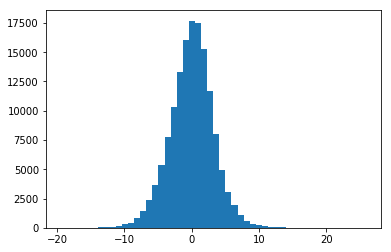

In [55]:
plt.hist(y_train_pred - y_train, bins=50)

(array([1.000e+00, 4.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 9.000e+00,
        1.700e+01, 1.100e+01, 2.900e+01, 3.400e+01, 4.900e+01, 8.200e+01,
        1.360e+02, 2.500e+02, 3.990e+02, 5.820e+02, 7.680e+02, 1.140e+03,
        1.581e+03, 1.982e+03, 2.557e+03, 3.101e+03, 3.602e+03, 3.711e+03,
        3.889e+03, 3.346e+03, 2.769e+03, 2.090e+03, 1.396e+03, 9.670e+02,
        6.270e+02, 4.010e+02, 2.690e+02, 1.560e+02, 9.500e+01, 6.000e+01,
        3.500e+01, 3.500e+01, 1.900e+01, 1.100e+01, 1.100e+01, 9.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00]),
 array([-18.19755695, -17.41832578, -16.63909461, -15.85986344,
        -15.08063227, -14.3014011 , -13.52216993, -12.74293876,
        -11.96370759, -11.18447642, -10.40524525,  -9.62601408,
         -8.84678291,  -8.06755174,  -7.28832057,  -6.5090894 ,
         -5.72985823,  -4.95062706,  -4.17139589,  -3.39216472,
         -2.61293355,  -1.83370238,  -1.05447121,  -0.27

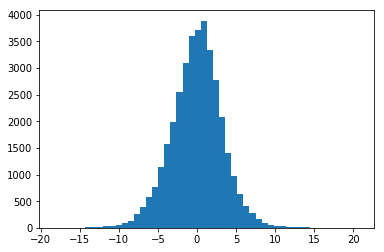

In [56]:
plt.hist(y_test_pred - y_test, bins=50)

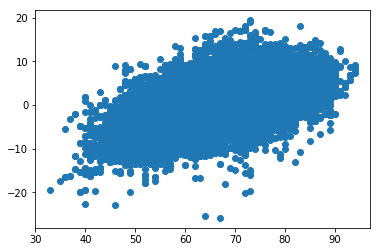

In [57]:
plt.scatter(y_train, y_train - y_train_pred)

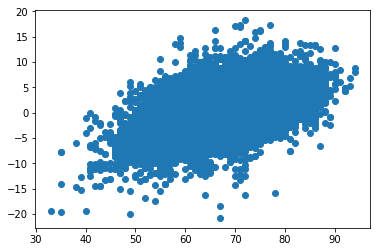

In [58]:
plt.scatter(y_test, y_test - y_test_pred)

In [59]:
# Fitting the Decision Tree Regression to the dataset
decisionregressor = DecisionTreeRegressor(random_state = 0)
decisionregressor.fit(X_train, y_train)
y_decision_train_pred = decisionregressor.predict(X_train)
y_decision_test_pred = decisionregressor.predict(X_test)

#### Evaluate Decision Tree Regression Model Performance

The below calculation shows that RMSE value for both Training and Test data is different. Test RMSE is more than Train RMSE which reveals the model as an overfitting one which is not recommended to be used.

In [60]:
print('RMSE Train', sqrt(mean_squared_error(y_decision_train_pred, y_train)))
print('RMSE Test' , sqrt(mean_squared_error(y_decision_test_pred, y_test)))

RMSE Train 0.20966679333229105
RMSE Test 1.296993244748972


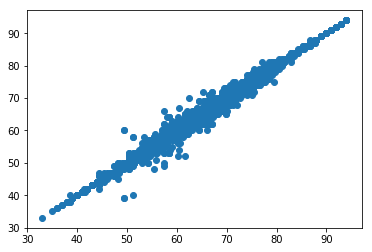

In [61]:
plt.scatter(y_decision_train_pred, y_train)

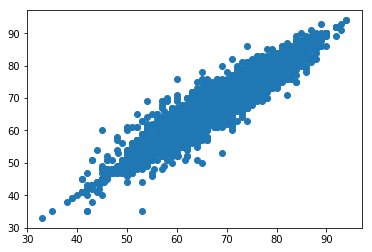

In [62]:
plt.scatter(y_decision_test_pred, y_test)

A group of predictors were selected to undergo data preprocessing tasks and fed into two different ML algorithms namely Multiple Linear Regression and DecisionTree Regression.
#### Inference/Conclusion : Predictive analysis report indicates that Linear model regression works far better than DecisionTree regression. So, Players rating is to be predicted with multiple linear regression model.